In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Tesla_stock_Price.csv")
df

,Date,Price,Open,High,Low,Volume,Chg%
0,1-Apr-11,1.78,1.83,1.88,1.77,42.98M,-3.78%
1,1-Apr-13,2.93,2.82,3.11,2.78,211.59M,15.81%
2,1-Apr-14,14.46,13.93,14.54,13.91,110.57M,4.03%
3,1-Apr-15,12.51,12.58,12.82,12.4,56.92M,-0.56%
4,1-Apr-16,15.84,16.32,16.53,15.55,239.96M,3.39%
...,...,...,...,...,...,...,...
3253,30-Sep-16,13.60,13.48,13.67,13.3,38.79M,1.64%
3254,30-Sep-19,16.06,16.20,16.27,15.74,89.19M,-0.50%
3255,30-Sep-20,143.00,140.44,144.64,140.16,144.44M,2.37%
3256,30-Sep-21,258.49,260.33,263.04,258.33,53.87M,-0.75%


In [3]:
df.shape

(3258, 7)

In [4]:
df.isnull().mean()*100

Date      0.000000
Price     2.455494
Open      2.455494
High      2.455494
Low       2.455494
Volume    2.455494
Chg%      3.683241
dtype: float64

In [5]:
df.dropna(inplace=True)

In [6]:
df

,Date,Price,Open,High,Low,Volume,Chg%
0,1-Apr-11,1.78,1.83,1.88,1.77,42.98M,-3.78%
1,1-Apr-13,2.93,2.82,3.11,2.78,211.59M,15.81%
2,1-Apr-14,14.46,13.93,14.54,13.91,110.57M,4.03%
3,1-Apr-15,12.51,12.58,12.82,12.4,56.92M,-0.56%
4,1-Apr-16,15.84,16.32,16.53,15.55,239.96M,3.39%
...,...,...,...,...,...,...,...
3253,30-Sep-16,13.60,13.48,13.67,13.3,38.79M,1.64%
3254,30-Sep-19,16.06,16.20,16.27,15.74,89.19M,-0.50%
3255,30-Sep-20,143.00,140.44,144.64,140.16,144.44M,2.37%
3256,30-Sep-21,258.49,260.33,263.04,258.33,53.87M,-0.75%


In [7]:
df.isnull().mean()*100

Date      0.0
Price     0.0
Open      0.0
High      0.0
Low       0.0
Volume    0.0
Chg%      0.0
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 0 to 3257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3138 non-null   object 
 1   Price   3138 non-null   float64
 2   Open    3138 non-null   float64
 3   High    3138 non-null   float64
 4   Low     3138 non-null   object 
 5   Volume  3138 non-null   object 
 6   Chg%    3138 non-null   object 
dtypes: float64(3), object(4)
memory usage: 196.1+ KB


In [9]:
def outlier(col):
    Q3, Q1= np.nanpercentile(col,[75,25])
    iqr=Q3-Q1
    ul=Q3+1.5*iqr
    ll=Q1-1.5*iqr
    return ul, ll

In [10]:
for column in df.columns:
    if df[column].dtype !="object":
        ul,ll=outlier(df[column])
        df[column]=np.where((df[column]>ul)|(df[column]<ll),np.nan,df[column])

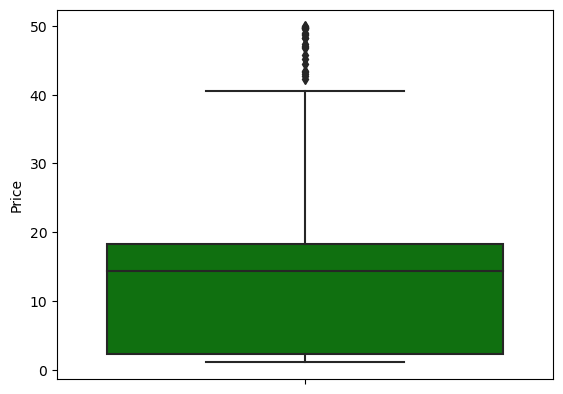

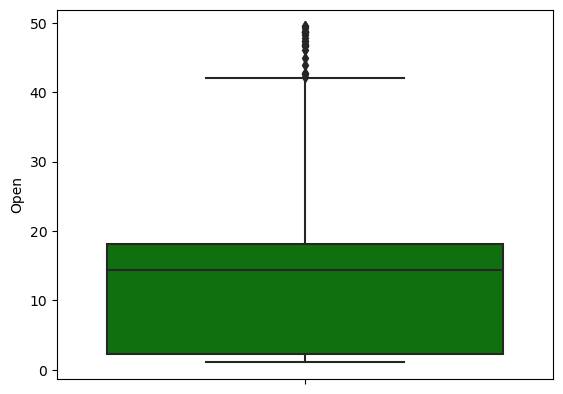

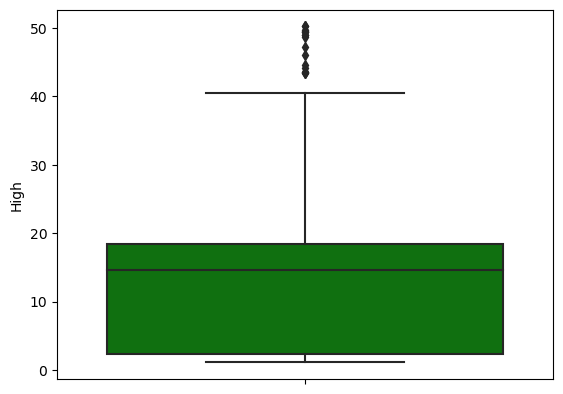

In [11]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i],color="green")
        plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
x=df[["Price"]].values
x

array([[ 1.78],
       [ 2.93],
       [14.46],
       ...,
       [  nan],
       [  nan],
       [  nan]])

In [16]:
df["Price"]=df["Price"].dropna()

In [20]:
df.dropna(inplace=True)
df

,Date,Price,Open,High,Low,Volume,Chg%
0,1-Apr-11,1.78,1.83,1.88,1.77,42.98M,-3.78%
1,1-Apr-13,2.93,2.82,3.11,2.78,211.59M,15.81%
2,1-Apr-14,14.46,13.93,14.54,13.91,110.57M,4.03%
3,1-Apr-15,12.51,12.58,12.82,12.4,56.92M,-0.56%
4,1-Apr-16,15.84,16.32,16.53,15.55,239.96M,3.39%
...,...,...,...,...,...,...,...
3250,30-Sep-13,12.89,12.60,12.97,12.53,134.02M,1.26%
3251,30-Sep-14,16.18,16.46,16.51,16.01,63.72M,-1.04%
3252,30-Sep-15,16.56,16.80,16.83,16.16,73.94M,0.73%
3253,30-Sep-16,13.60,13.48,13.67,13.3,38.79M,1.64%


In [21]:
df.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

In [23]:
x=df[['Price']].values
x

array([[ 1.78],
       [ 2.93],
       [14.46],
       ...,
       [16.56],
       [13.6 ],
       [16.06]])

In [25]:
y=df[['Open']].values
y

array([[ 1.83],
       [ 2.82],
       [13.93],
       ...,
       [16.8 ],
       [13.48],
       [16.2 ]])

In [34]:
from sklearn.preprocessing import StandardScaler as sc
from sklearn.linear_model import LinearRegression


In [28]:
sc=StandardScaler()

In [30]:
x=sc.fit_transform(x)
x

array([[-1.29041289],
       [-1.15507083],
       [ 0.20188038],
       ...,
       [ 0.44902674],
       [ 0.10066806],
       [ 0.39018237]])

In [31]:
y

array([[ 1.83],
       [ 2.82],
       [13.93],
       ...,
       [16.8 ],
       [13.48],
       [16.2 ]])

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [35]:
model=LinearRegression()

In [36]:
model.fit(x_train,y_train)

LinearRegression()

In [37]:
train_score =model.score(x_train,y_train)*100
train_score

99.77808870871736

In [38]:
test_score =model.score(x_test,y_test)*100
test_score

99.77197787151367

In [39]:
model.coef_

array([[8.48773342]])

In [40]:
model.intercept_

array([12.74305846])